In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# df = pd.read_csv('preprocessed_train.csv')
df = pd.read_csv('tes.csv')
df.drop(columns=['Id'], inplace=True)

In [2]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

feature selection

In [3]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

selector = SelectKBest(f_regression, k=25)
selector.fit_transform(X, y)

support = selector.get_support(indices=True)

# Source - https://stackoverflow.com/a/3179119
# Posted by kennytm, modified by community. See post 'Timeline' for change history
# Retrieved 2026-02-15, License - CC BY-SA 4.0

support = [df.columns.values.tolist()[i] for i in support]
print(support)


['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'Neighborhood_NoRidge', 'Foundation_CBlock', 'GarageType_CarPort', 'SaleType_ConLw']


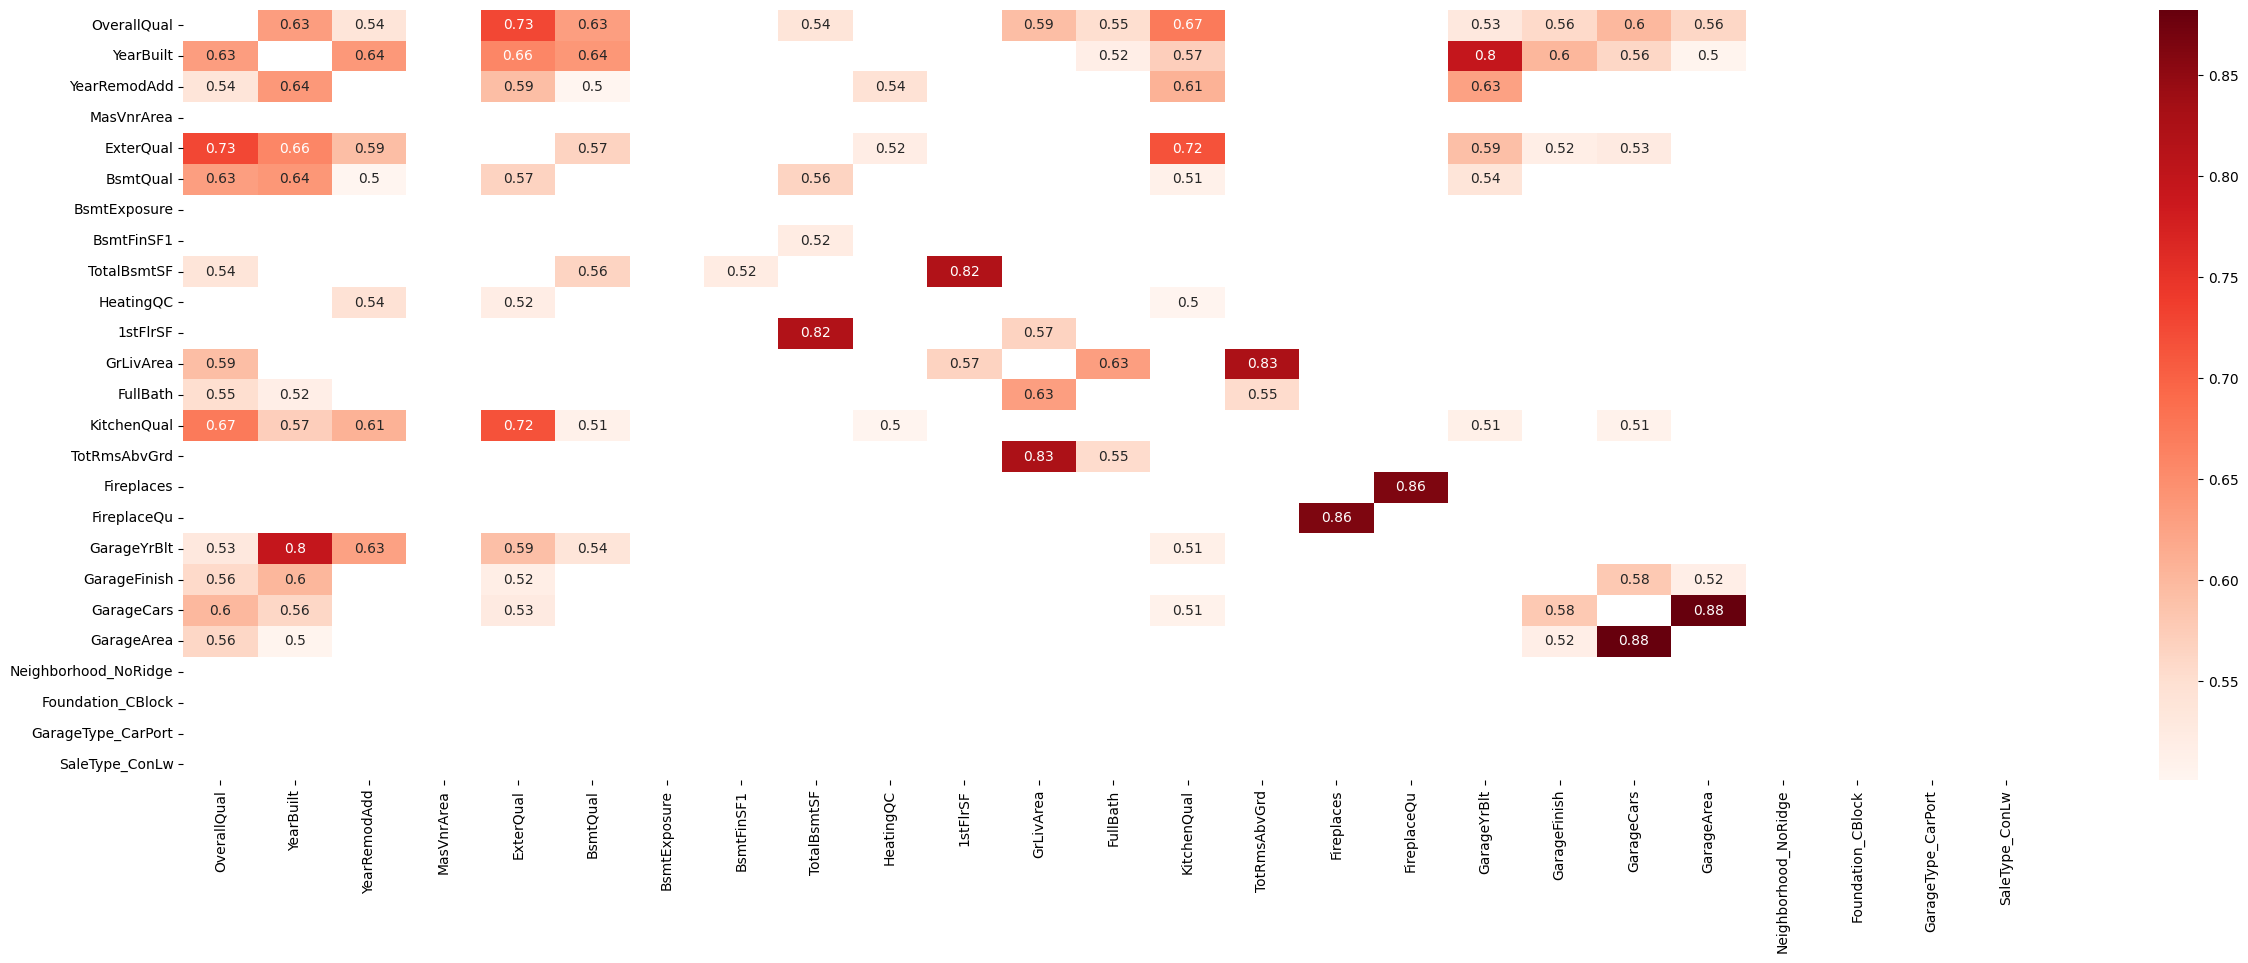

In [4]:
# new_df = df[support].drop(columns=['Fireplaces', 'GarageYrBlt', 'GarageCars', 'TotRmsAbvGrd', 'TotalBsmtSF', 'ExterQual', 'BsmtQual', 'KitchenQual', 'YearBuilt', 'FullBath'])
corr_matrix = df[support].corr().abs()

# change this value as needed, if 0.5 does not work for your scenario
threshold = 0.5

filtered_corr_df = corr_matrix[(corr_matrix >= threshold) & (corr_matrix != 1.000)] 

plt.figure(figsize=(30,10))
sns.heatmap(filtered_corr_df, annot=True, cmap="Reds")
plt.show()
